In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from arjun_plot.utils import *

%matplotlib inline

In [2]:
andersen_2000_df = pd.read_csv('../data/andersen_bmj_2000_table1.tsv', sep="\t")
magnus_2019_df = pd.read_csv('../data/magnus_etal_bmj_2019.tsv', sep="\t")
andersen_2000_df.head()

,Maternal_age_min,Maternal_age_max,Live_births,Spontaneous_abortions,Induced_abortions,Ectopic_pregnancies,Stillbirth,All_pregnancy_outcomes
0,12,19,44674,5427,49884,808,223,101016
1,20,24,246038,24465,74683,4163,1046,350395
2,25,29,312904,33728,59014,7233,1270,414149
3,30,34,157457,22391,48641,5861,699,235049
4,35,39,43471,11369,36195,2679,226,93940


In [25]:
# Fit a three degree polynomial to the live-birth rate function ...  
xs = np.arange(18, 50)
polynomial_features= PolynomialFeatures(degree=3)
xp = polynomial_features.fit_transform(xs.reshape(-1,1))
x_andersen = (andersen_2000_df.Maternal_age_min.values + andersen_2000_df.Maternal_age_max.values) / 2
y_andersen = (andersen_2000_df.Live_births / andersen_2000_df.All_pregnancy_outcomes.values)
xp_andersen = polynomial_features.fit_transform(x_andersen.reshape(-1,1))
model_andersen = sm.OLS(y_andersen, xp_andersen).fit()
ypred_andersen = model_andersen.predict(xp)
_, upper_andersen, lower_andersen = wls_prediction_std(model_andersen, xp)

x_magnus = (magnus_2019_df.Maternal_age_min.values + magnus_2019_df.Maternal_age_max.values) / 2
y_magnus = (magnus_2019_df.Live_births / magnus_2019_df.Total_pregnancies.values)
xp_magnus = polynomial_features.fit_transform(x_magnus.reshape(-1,1))
model_magnus = sm.OLS(y_magnus, xp_magnus).fit()
ypred_magnus = model_magnus.predict(xp)
_, upper_magnus, lower_magnus = wls_prediction_std(model_magnus, xp)


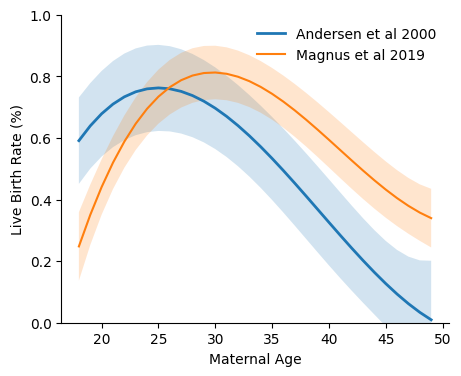

In [27]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
# NOTE: this does not adjust for induced abortions  ... 
ax.plot(xs, ypred_andersen, lw=2, label='Andersen et al 2000')
ax.fill_between(xs, upper_andersen, lower_andersen, alpha=0.2)

ax.plot(xs, ypred_magnus, label=r'Magnus et al 2019')
ax.fill_between(xs, upper_magnus, lower_magnus, alpha=0.2)
ax.set_xlabel('Maternal Age')
ax.set_ylabel('Live Birth Rate (%)')
ax.set_ylim(0,1)
ax.legend(frameon=False)
debox(ax)